<a href="https://colab.research.google.com/github/Uzair56/FORMATIONSTRADER/blob/main/Retail_Sales_%26_Customer_Discount_Impact_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
#load data
sales = pd.read_csv("/content/project1_df.csv")
sales.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [3]:
# check last rows of data
sales.tail()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.9073,2709.0173,Debit Card,Other
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.3039,3402.7139,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.6875,3677.0575,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.4735,3772.9135,Credit Card,Kolkata
54999,126691,9172953722,Male,25-45,21/07/2022 09:05:18,Beauty and Health,Yes,NEWYEARS,380.81,3703.5819,3322.7719,Credit Card,Mumbai


In [4]:
#check data size
sales.shape

(55000, 13)

In [5]:
#check column names
sales.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

In [6]:
#data structure and data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [7]:
#statistical summry of numeric data
sales.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [8]:
#check cateogrical data summry
sales.describe(include='object')

,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Purchase Method,Location
count,55000,55000,55000,55000,55000,27415,55000,55000
unique,3,5,54988,9,2,5,8,14
top,Female,25-45,02/09/2023 03:18:58,Electronics,No,NEWYEARS,Credit Card,Mumbai
freq,18454,22010,2,16574,27585,8135,22096,11197


In [9]:
#clean data set column names
sales.columns = sales.columns.str.lower().str.replace(' ', '_')
sales.columns

Index(['cid', 'tid', 'gender', 'age_group', 'purchase_date',
       'product_category', 'discount_availed', 'discount_name',
       'discount_amount_(inr)', 'gross_amount', 'net_amount',
       'purchase_method', 'location'],
      dtype='object')

In [10]:
#discount name (null = no discunt)
sales['discount_name'] = sales['discount_name'].fillna('No')
sales['discount_name'].isnull().sum()

np.int64(0)

In [11]:
#convert data time int datetime format
sales['purchase_date'] = pd.to_datetime(sales['purchase_date'], format='%d/%m/%Y %H:%M:%S')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cid                    55000 non-null  int64         
 1   tid                    55000 non-null  int64         
 2   gender                 55000 non-null  object        
 3   age_group              55000 non-null  object        
 4   purchase_date          55000 non-null  datetime64[ns]
 5   product_category       55000 non-null  object        
 6   discount_availed       55000 non-null  object        
 7   discount_name          55000 non-null  object        
 8   discount_amount_(inr)  55000 non-null  float64       
 9   gross_amount           55000 non-null  float64       
 10  net_amount             55000 non-null  float64       
 11  purchase_method        55000 non-null  object        
 12  location               55000 non-null  object        
dtypes

In [12]:
#identify negative net amounts
sales[sales['net_amount'] < 0]

,cid,tid,gender,age_group,purchase_date,product_category,discount_availed,discount_name,discount_amount_(inr),gross_amount,net_amount,purchase_method,location
311,565676,1356242586,Male,45-60,2020-05-03 20:14:16,Beauty and Health,Yes,NEWYEARS,469.58,279.258000,-190.322000,Debit Card,Mumbai
383,101206,4082960786,Female,18-25,2020-05-05 07:02:36,Electronics,Yes,NEWYEARS,358.58,204.886500,-153.693500,Debit Card,Delhi
398,270557,9264884678,Male,45-60,2021-03-06 12:54:09,Home & Kitchen,Yes,WELCOME5,385.36,246.808100,-138.551900,Debit Card,Bangalore
489,334639,1610899978,Male,18-25,2022-09-18 22:31:07,Home & Kitchen,Yes,NEWYEARS,427.33,348.448275,-78.881725,Credit Card,Delhi
564,924584,8564435752,Other,25-45,2020-02-13 05:04:55,Electronics,Yes,SAVE10,429.49,414.914325,-14.575675,Credit Card,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,654558,6092629329,Male,25-45,2023-02-19 10:08:25,Electronics,Yes,SEASONALOFFER21,443.65,379.287000,-64.363000,Debit Card,Chennai
54280,253300,9018344109,Female,60 and above,2020-03-07 19:06:13,Home & Kitchen,Yes,SEASONALOFFER21,305.25,178.402875,-126.847125,Paytm UPI,Ahmedabad
54378,789978,1230560432,Female,25-45,2020-08-30 05:05:20,Books,Yes,SAVE10,212.69,185.241000,-27.449000,PhonePe UPI,Mumbai
54536,569063,8940735281,Male,45-60,2021-08-20 17:17:32,Electronics,Yes,FESTIVE50,492.84,216.315000,-276.525000,Google Pay UPI,Lucknow


In [13]:
# Now isolate the negaitve net amount to anlyze the data
negaitve_net = sales[sales['net_amount'] < 0]
negaitve_net.head()

,cid,tid,gender,age_group,purchase_date,product_category,discount_availed,discount_name,discount_amount_(inr),gross_amount,net_amount,purchase_method,location
311,565676,1356242586,Male,45-60,2020-05-03 20:14:16,Beauty and Health,Yes,NEWYEARS,469.58,279.258000,-190.322000,Debit Card,Mumbai
383,101206,4082960786,Female,18-25,2020-05-05 07:02:36,Electronics,Yes,NEWYEARS,358.58,204.886500,-153.693500,Debit Card,Delhi
398,270557,9264884678,Male,45-60,2021-03-06 12:54:09,Home & Kitchen,Yes,WELCOME5,385.36,246.808100,-138.551900,Debit Card,Bangalore
489,334639,1610899978,Male,18-25,2022-09-18 22:31:07,Home & Kitchen,Yes,NEWYEARS,427.33,348.448275,-78.881725,Credit Card,Delhi
564,924584,8564435752,Other,25-45,2020-02-13 05:04:55,Electronics,Yes,SAVE10,429.49,414.914325,-14.575675,Credit Card,Delhi


In [14]:
# number of negaative amount
negaitve_net.shape

(613, 13)

In [ ]:
# check if discount available
negaitve_net['discount_availed'].value_counts()

,count
discount_availed,
Yes,613


Business logic (write this in your notebook):

“Negative net amounts occur only when discounts are applied, indicating refunds or heavy promotional adjustments. These records are valid business cases and will be retained for discount impact analysis but excluded from revenue KPIs.”

In [15]:
# create clean revnue column no negetive value
sales['clean_net_amount'] = sales['net_amount'].apply(lambda x: x if x >= 0 else 0)
sales['clean_net_amount'].head()

,clean_net_amount
0,661.004000
1,4463.801875
2,1774.832575
3,5695.612650
4,1852.731500


In [16]:
# create time features to find patterns monthly, yearly daile
sales['year'] = sales['purchase_date'].dt.year
sales['month'] = sales['purchase_date'].dt.month
sales['day'] = sales['purchase_date'].dt.day
sales['day_name'] = sales['purchase_date'].dt.day_name()

sales.head()

,cid,tid,gender,age_group,purchase_date,product_category,discount_availed,discount_name,discount_amount_(inr),gross_amount,net_amount,purchase_method,location,clean_net_amount,year,month,day,day_name
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,661.004000,2023,8,30,Wednesday
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,4463.801875,2024,2,23,Friday
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,1774.832575,2022,3,6,Sunday
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No,0.00,5695.612650,5695.612650,Debit Card,Delhi,5695.612650,2020,11,4,Wednesday
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,1852.731500,2022,5,31,Tuesday


In [17]:
# now find total rev, customers, orders, average order value
positive_orders = sales[sales['clean_net_amount'] > 0]

postive_total_orders = positive_orders['tid'].nunique()

gross_revenue = sales['clean_net_amount'].sum()


total_customers = sales['cid'].nunique()

#Gross average order value (only postive values)
gross_avg_order_value = gross_revenue / postive_total_orders

#Total orders (all unique order ids)
total_orders = sales['tid'].nunique()

#net revnue (all transactions)
net_revenue = sales['net_amount'].sum()

#net Aov (after discount added)
net_aov = net_revenue / total_orders

print("Gross Revenue (clean):", gross_revenue)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Gross Average Order Value (AOV):", gross_avg_order_value)

print("Net Revenue :", net_revenue)
print("Net Average Order Value (AOV):", net_aov)



Gross Revenue (clean): 158244626.20702502
Total Orders: 55000
Total Customers: 29071
Gross Average Order Value (AOV): 2909.603879732749
Net Revenue : 158177239.558525
Net Average Order Value (AOV): 2875.949810155


In [18]:
#gross monthly revunue
monthly_revenue = sales.groupby(['year', 'month'])['clean_net_amount'].sum().reset_index()
monthly_revenue.head()

,year,month,clean_net_amount
0,2019,9,9.253945e+05
1,2019,10,2.699066e+06
2,2019,11,2.714410e+06
3,2019,12,3.203997e+06
4,2020,1,2.100028e+06


In [19]:
# Create a date column for proper plotting
monthly_revenue['year_month'] = pd.to_datetime(
    monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str) + '-01'
)
monthly_revenue.head()

,year,month,clean_net_amount,year_month
0,2019,9,9.253945e+05,2019-09-01
1,2019,10,2.699066e+06,2019-10-01
2,2019,11,2.714410e+06,2019-11-01
3,2019,12,3.203997e+06,2019-12-01
4,2020,1,2.100028e+06,2020-01-01


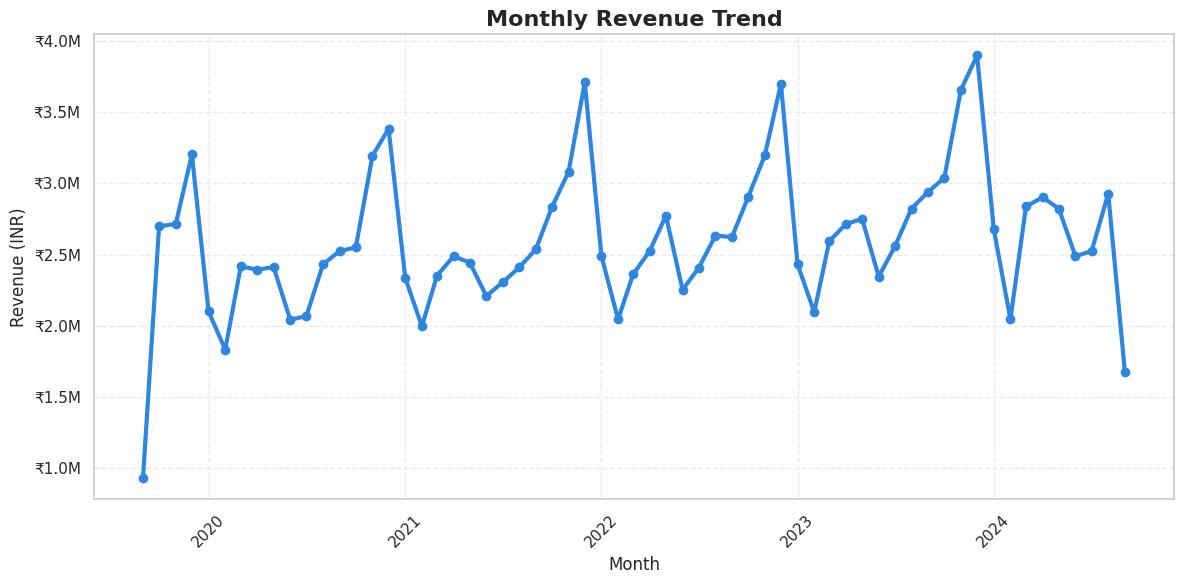

In [20]:
# Plot Monthly Revenue Trend

plt.figure(figsize=(12, 6))

plt.plot(
    monthly_revenue['year_month'],
    monthly_revenue['clean_net_amount'],
    marker='o',
    linewidth=3,
    color='#2E86DE'  # Beautiful Blue
)

plt.title("Monthly Revenue Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (INR)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"₹{x/1e6:.1f}M"))
plt.tight_layout()
plt.show()

Top 10 Products categories by product:

In [21]:
#calculate revnue by category
category_revenue = (
    sales.groupby('product_category')['clean_net_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

/tmp/ipython-input-74894573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


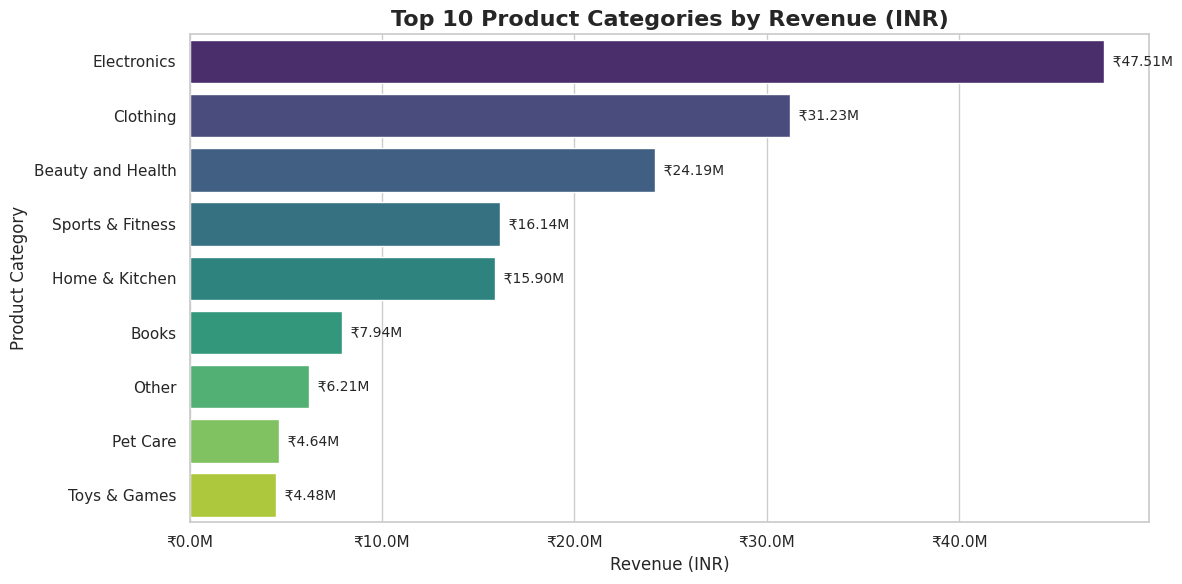

In [22]:
# Plot Top 10 categories (Beautiful chart)
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index,
    palette="viridis"
)

plt.title("Top 10 Product Categories by Revenue (INR)", fontsize=16, fontweight="bold")
plt.xlabel("Revenue (INR)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

# Format x-axis into Millions (M)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"₹{x/1e6:.1f}M"))

# Add labels in Millions on each bar
for i, v in enumerate(category_revenue.values):
    ax.text(v, i, f"  ₹{v/1e6:.2f}M", va='center', fontsize=10)


plt.tight_layout()
plt.show()

Discount Impact Analysis (Discount vs No Discount):

Do discounts increase revenue or not?
How much revenue comes from discounted vs non-discounted transactions?


For discount impact analysis, I evaluate discounts using two perspectives: (1) Sales performance using only positive revenue transactions, and (2) refund/adjustment impact using negative net amount transactions. This ensures revenue KPIs are not distorted while still capturing the negative effects of discounts.

In [23]:
# create two data sets to check discount impact (positive sales and negative)
positive_sales = sales[sales['net_amount'] >= 0].copy()
negative_sales = sales[sales['net_amount'] < 0].copy()

In [24]:
#positive sales kpis based on discount avaialability
pos_kpis = positive_sales.groupby('discount_availed').agg(
    revenue_positive=('net_amount', 'sum'),
    orders_positive=('tid', 'nunique'),
    customers_positive=('cid', 'nunique')
).reset_index()

pos_kpis['aov_positive'] = pos_kpis['revenue_positive'] / pos_kpis['orders_positive']

pos_kpis

,discount_availed,revenue_positive,orders_positive,customers_positive,aov_positive
0,No,8.312407e+07,27585,19617,3013.379444
1,Yes,7.512055e+07,26802,19169,2802.796592


In [27]:
# Negative KPIs (loss orders + loss amount)
neg_kpis = negative_sales.groupby('discount_availed').agg(
    lost_orders=('tid', 'nunique'),
    lost_amount=('net_amount', lambda x: x.abs().sum())
).reset_index()

neg_kpis

,discount_availed,lost_orders,lost_amount
0,Yes,613,67386.6485


In [28]:
# Merge Positive + Negative KPIs (Final Discount Impact Table)
discount_impact = pd.merge(pos_kpis, neg_kpis, on='discount_availed', how='left')

discount_impact['lost_orders'] = discount_impact['lost_orders'].fillna(0).astype(int)
discount_impact['lost_amount'] = discount_impact['lost_amount'].fillna(0)

In [30]:
# Add Final Business KPIs (Refund rate / loss rate + Net revenue)
discount_impact['refund_rate'] = discount_impact['lost_orders'] / (
    discount_impact['orders_positive'] + discount_impact['lost_orders']
)

discount_impact['net_revenue_after_refunds'] = (
    discount_impact['revenue_positive'] - discount_impact['lost_amount']
)

discount_impact

,discount_availed,revenue_positive,orders_positive,customers_positive,aov_positive,lost_orders,lost_amount,refund_rate,net_revenue_after_refunds
0,No,8.312407e+07,27585,19617,3013.379444,0,0.0000,0.00000,8.312407e+07
1,Yes,7.512055e+07,26802,19169,2802.796592,613,67386.6485,0.02236,7.505317e+07


In [35]:
#convert currency into millions

discount_impact['revenue_positive_M'] = discount_impact['revenue_positive'] / 1e6
discount_impact['lost_amount_M'] = discount_impact['lost_amount'] / 1e6
discount_impact['net_revenue_after_refunds_M'] = discount_impact['net_revenue_after_refunds'] / 1e6

final_discount_impact = discount_impact[[
    'discount_availed',
    'revenue_positive_M',
    'orders_positive',
    'customers_positive',
    'aov_positive',
    'lost_orders',
    'lost_amount_M',
    'refund_rate',
    'net_revenue_after_refunds_M'
]]


final_discount_impact.style.format({
    "revenue_positive_M": "₹{:.2f}M",
    "lost_amount_M": "₹{:.2f}M",
    "net_revenue_after_refunds_M": "₹{:.2f}M",
    "aov_positive": "₹{:,.0f}",
    "refund_rate": "{:.2%}"
})


,discount_availed,revenue_positive_M,orders_positive,customers_positive,aov_positive,lost_orders,lost_amount_M,refund_rate,net_revenue_after_refunds_M
0,No,₹83.12M,27585,19617,"₹3,013",0,₹0.00M,0.00%,₹83.12M
1,Yes,₹75.12M,26802,19169,"₹2,803",613,₹0.07M,2.24%,₹75.05M


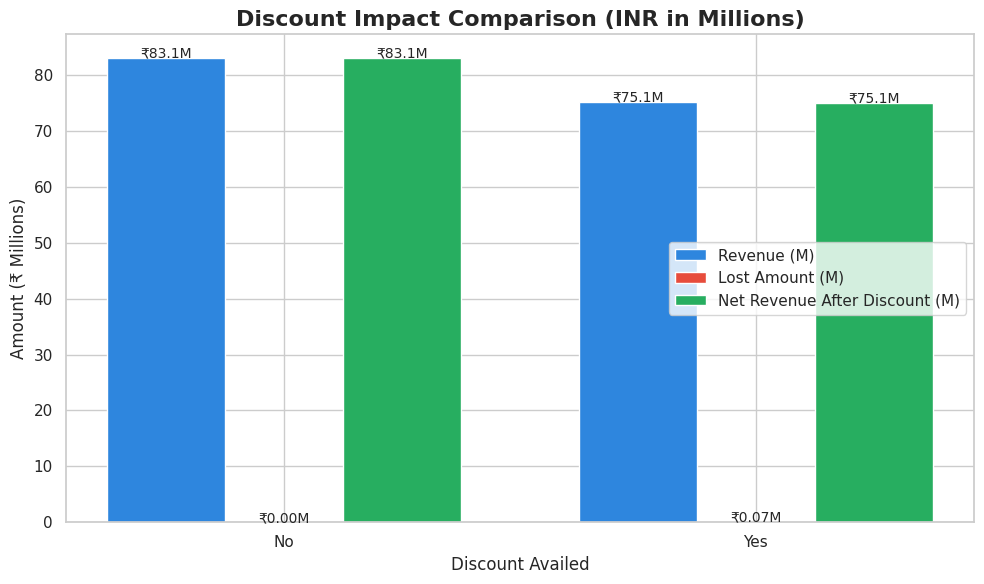

In [39]:
# Discount Impact – Comparison Plot

# Data for plot
labels = final_discount_impact['discount_availed']

positive_revenue = final_discount_impact['revenue_positive_M']
refund_amount = final_discount_impact['lost_amount_M']
net_revenue = final_discount_impact['net_revenue_after_refunds_M']

# Positions for grouped bars
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 6))

# Bars
plt.bar(x - width, positive_revenue, width, label='Revenue (M)', color='#2E86DE')
plt.bar(x, refund_amount, width, label='Lost Amount (M)', color='#E74C3C')
plt.bar(x + width, net_revenue, width, label='Net Revenue After Discount (M)', color='#27AE60')

# Titles and labels
plt.title("Discount Impact Comparison (INR in Millions)", fontsize=16, fontweight="bold")
plt.xlabel("Discount Availed", fontsize=12)
plt.ylabel("Amount (₹ Millions)", fontsize=12)

# X-axis labels
plt.xticks(x, labels)

# Add value labels on bars
for i in range(len(labels)):
    plt.text(x[i] - width, positive_revenue.iloc[i] + 0.1, f"₹{positive_revenue.iloc[i]:.1f}M", ha='center', fontsize=10)
    plt.text(x[i], refund_amount.iloc[i] + 0.02, f"₹{refund_amount.iloc[i]:.2f}M", ha='center', fontsize=10)
    plt.text(x[i] + width, net_revenue.iloc[i] + 0.1, f"₹{net_revenue.iloc[i]:.1f}M", ha='center', fontsize=10)

# Legend
plt.legend()

# Layout
plt.tight_layout()
plt.show()


Discount Campaign Analysis (Top Discount Names)

In [42]:
# clean discount name column
sales['discount_name'] = sales['discount_name'].fillna('No')
sales


,cid,tid,gender,age_group,purchase_date,product_category,discount_availed,discount_name,discount_amount_(inr),gross_amount,net_amount,purchase_method,location,clean_net_amount,year,month,day,day_name
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,661.004000,2023,8,30,Wednesday
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,4463.801875,2024,2,23,Friday
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,1774.832575,2022,3,6,Sunday
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No,0.00,5695.612650,5695.612650,Debit Card,Delhi,5695.612650,2020,11,4,Wednesday
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,1852.731500,2022,5,31,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,295864,5407639888,Other,25-45,2020-02-23 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.907300,2709.017300,Debit Card,Other,2709.017300,2020,2,23,Sunday
54996,706435,1144029904,Other,18-25,2021-07-12 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.303900,3402.713900,Cash on Delivery,Bangalore,3402.713900,2021,7,12,Monday
54997,649435,9587323189,Male,45-60,2024-08-02 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.687500,3677.057500,Credit Card,Mumbai,3677.057500,2024,8,2,Friday
54998,982183,5032564481,Female,45-60,2020-08-05 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.473500,3772.913500,Credit Card,Kolkata,3772.913500,2020,8,5,Wednesday


In [53]:
#Create discount campaign performance table (Positive + Negative)
# positive performance (sales impact)
pos_campaign = positive_sales.groupby('discount_name').agg(
    revenue_positive=('net_amount', 'sum'),
    orders_positive=('tid', 'nunique'),
    customers_positive=('cid', 'nunique')
).reset_index()

pos_campaign['aov_positive'] = pos_campaign['revenue_positive'] / pos_campaign['orders_positive']

# negative performance (refund impact)
neg_campaign = negative_sales.groupby('discount_name').agg(
    refund_orders=('tid', 'nunique'),
    refund_amount=('net_amount', lambda x: x.abs().sum())
).reset_index()


# merge
campaign_impact = pd.merge(pos_campaign, neg_campaign, on='discount_name', how='left')
campaign_impact[['refund_orders', 'refund_amount']] = campaign_impact[['refund_orders', 'refund_amount']].fillna(0)

# extra KPIs
campaign_impact['net_revenue_after_refunds'] = campaign_impact['revenue_positive'] - campaign_impact['refund_amount']
campaign_impact['refund_rate'] = campaign_impact['refund_orders'] / (campaign_impact['orders_positive'] + campaign_impact['refund_orders'])

# convert to Millions
campaign_impact['revenue_positive_M'] = campaign_impact['revenue_positive'] / 1e6
campaign_impact['refund_amount_M'] = campaign_impact['refund_amount'] / 1e6
campaign_impact['net_revenue_M'] = campaign_impact['net_revenue_after_refunds'] / 1e6

campaign_impact.sort_values('net_revenue_M', ascending=False).head(10)


,discount_name,revenue_positive,orders_positive,customers_positive,aov_positive,refund_orders,refund_amount,net_revenue_after_refunds,refund_rate,revenue_positive_M,refund_amount_M,net_revenue_M
2,No,8.312407e+07,27585,19617,3013.379444,0.0,0.000000,8.312407e+07,0.000000,83.124072,0.000000,83.124072
1,NEWYEARS,2.223292e+07,7952,7138,2795.890117,183.0,20540.849450,2.221238e+07,0.022495,22.232918,0.020541,22.212377
4,SEASONALOFFER21,1.915682e+07,6792,6209,2820.497081,148.0,15527.282550,1.914129e+07,0.021326,19.156816,0.015527,19.141289
3,SAVE10,1.127621e+07,4019,3784,2805.726047,96.0,10956.092900,1.126526e+07,0.023329,11.276213,0.010956,11.265257
0,FESTIVE50,1.123092e+07,4024,3800,2790.984547,91.0,9931.733925,1.122099e+07,0.022114,11.230922,0.009932,11.220990
5,WELCOME5,1.122369e+07,4015,3816,2795.438375,95.0,10430.689675,1.121325e+07,0.023114,11.223685,0.010431,11.213254


/tmp/ipython-input-1757542358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


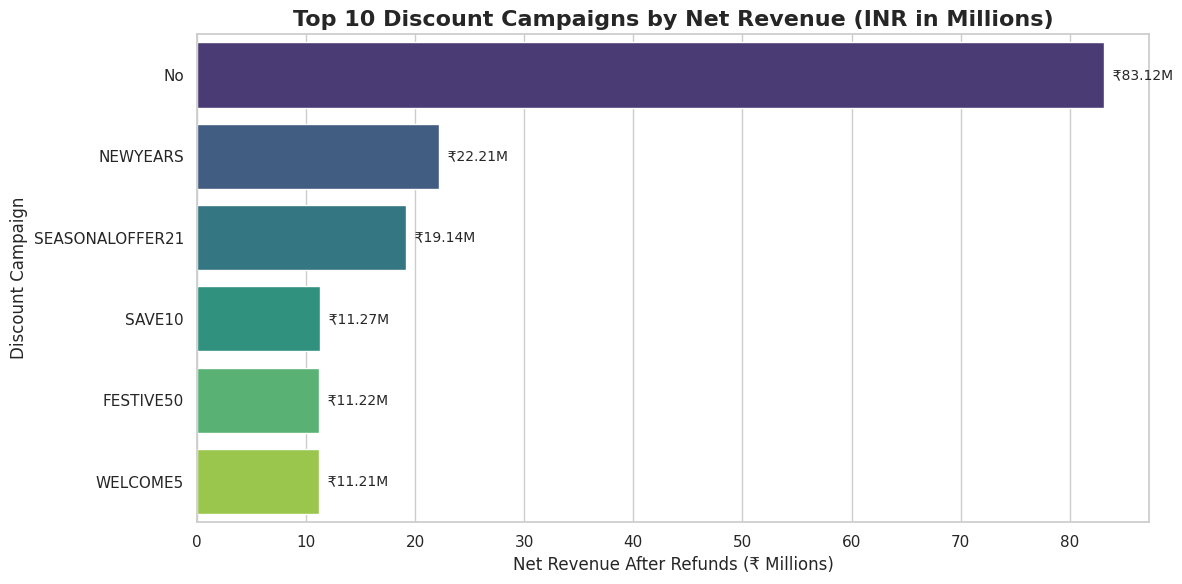

In [48]:
# Plot: Top 10 Discount Campaigns by Net Revenue

top10_campaigns = campaign_impact.sort_values('net_revenue_M', ascending=False).head(5)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=top10_campaigns['net_revenue_M'],
    y=top10_campaigns['discount_name'],
    palette="viridis"
)

plt.title("Top 10 Discount Campaigns by Net Revenue (INR in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Net Revenue After Refunds (₹ Millions)")
plt.ylabel("Discount Campaign")

for i, v in enumerate(top10_campaigns['net_revenue_M']):
    ax.text(v, i, f"  ₹{v:.2f}M", va='center', fontsize=10)

plt.tight_layout()
plt.show()


I didn’t only compare Discount Yes vs No. I also evaluated each discount campaign (discount_name) by revenue, AOV, refund rate, and net revenue impact.

In [59]:
# Top 10 Customers by Total Spend


top_customers = (
    sales.groupby('cid')['clean_net_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


,clean_net_amount
cid,
308795,27966.338575
838253,27960.864050
938373,27948.780325
551839,27646.756075
949541,27120.619750
700005,26495.393450
583020,26183.231350
949729,25866.166700
698782,25661.707900


/tmp/ipython-input-2502188767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


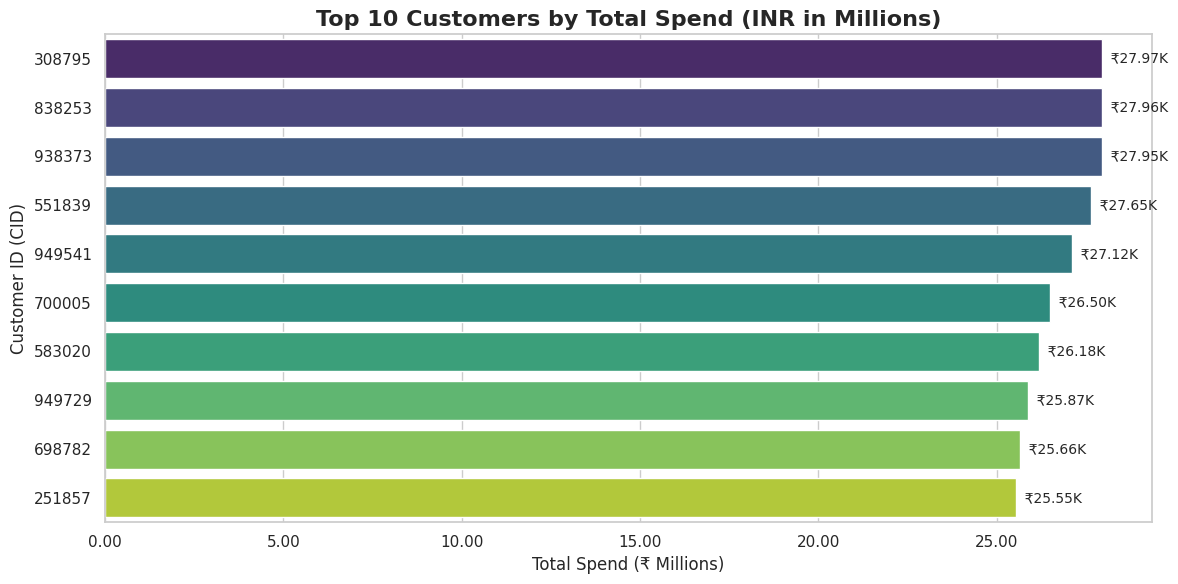

In [64]:
# Plot Top 10 Customers
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=top_customers.values / 1e3,
    y=top_customers.index.astype(str),
    palette="viridis"
)

# format x-axis ticks to 2 decimals
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.title("Top 10 Customers by Total Spend (INR in Millions)", fontsize=16, fontweight="bold")
plt.xlabel("Total Spend (₹ Millions)", fontsize=12)
plt.ylabel("Customer ID (CID)", fontsize=12)

# labels on bars
for i, v in enumerate(top_customers.values / 1e3):
    ax.text(v, i, f"  ₹{v:.2f}K", va="center", fontsize=10)

plt.tight_layout()
plt.show()


In [65]:
# Repeat Customers vs One-time Customers

customer_orders = sales.groupby('cid')['tid'].nunique()

repeat_customers = (customer_orders > 1).sum()
one_time_customers = (customer_orders == 1).sum()

total_customers = customer_orders.shape[0]

repeat_rate = (repeat_customers / total_customers) * 100
one_time_rate = (one_time_customers / total_customers) * 100

print("Total Customers:", total_customers)
print("Repeat Customers:", repeat_customers, f"({repeat_rate:.2f}%)")
print("One-time Customers:", one_time_customers, f"({one_time_rate:.2f}%)")


Total Customers: 29071
Repeat Customers: 16073 (55.29%)
One-time Customers: 12998 (44.71%)


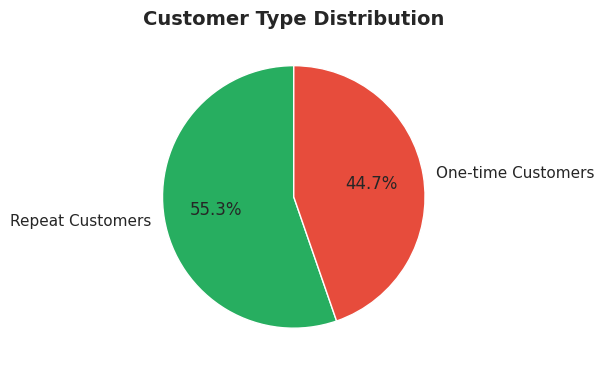

In [66]:
# Plot repeat vs non repeat customer
plt.figure(figsize=(6, 6))

plt.pie(
    [repeat_customers, one_time_customers],
    labels=["Repeat Customers", "One-time Customers"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#27AE60", "#E74C3C"]
)

plt.title("Customer Type Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
